Antes de iniciar, certifique-se que obteve uma maquina com GPU ou TPU

Seguir os passos descritos aqui https://www.kaggle.com/general/74235


In [100]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload() #upload kaggle.json.

Baixar e extrair os dados

In [101]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d theforcecoder/wind-power-forecasting
# !unzip wind-power-forecasting.zip

# import os
# os.remove('wind-power-forecasting.zip')

Carregar dataset

In [102]:
import pandas as pd

df = pd.read_csv('Turbine_Data.csv', parse_dates = True, header = 0)
df['Time'] = pd.to_datetime(df["Unnamed: 0"], yearfirst = True)

Visualização do dataset

In [103]:
#Show the first 148 rows
df.head(148)

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed,Time
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:00:00+00:00
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:10:00+00:00
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:20:00+00:00
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:30:00+00:00
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 00:40:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2017-12-31 23:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN,2017-12-31 23:50:00+00:00
144,2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088,2018-01-01 00:00:00+00:00
145,2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343,2018-01-01 00:10:00+00:00
146,2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610,2018-01-01 00:20:00+00:00


In [128]:
df.columns[1:-1]
len(df.columns[1:-1])

21

In [105]:
feature_keys = ['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'ControlBoxTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature',
       'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG',
       'WindDirection', 'WindSpeed']

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(feature_keys[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)


IndexError: index 7 is out of bounds for axis 0 with size 7

Error in callback <function flush_figures at 0x000001A00FD11F70> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


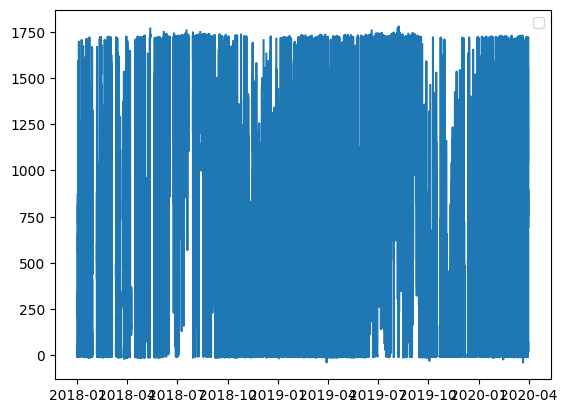

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


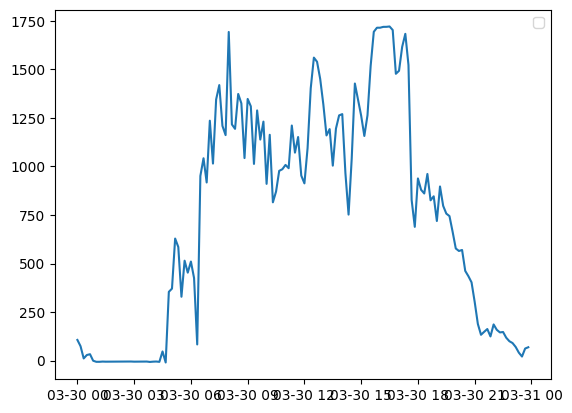

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


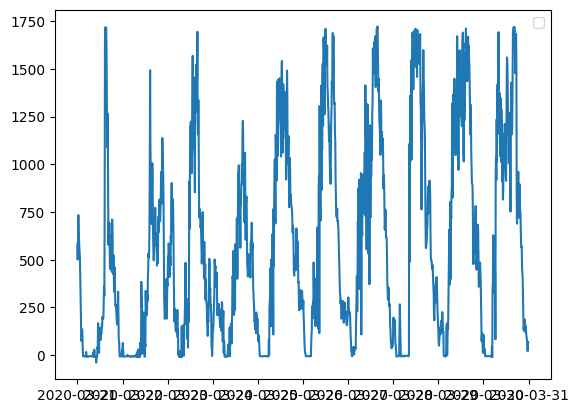

In [106]:
from matplotlib import pylab as plt
#Plot ActivePower
plt.plot(df["ActivePower"])
plt.legend()
plt.show()

#Plot ActivePower. Last 24 hours -   6 * 24
plt.plot(df["ActivePower"][-144:])
plt.legend()
plt.show()

#Plot ActivePower. Last 10 days -  6(m) * 24(h) * 10(d)
plt.plot(df["ActivePower"][-1440:])
plt.legend()
plt.show()

C:\Users\Marli\AppData\Local\Temp\ipykernel_15348\4024013712.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) #plot pairwise correlation of columns


<Axes: >

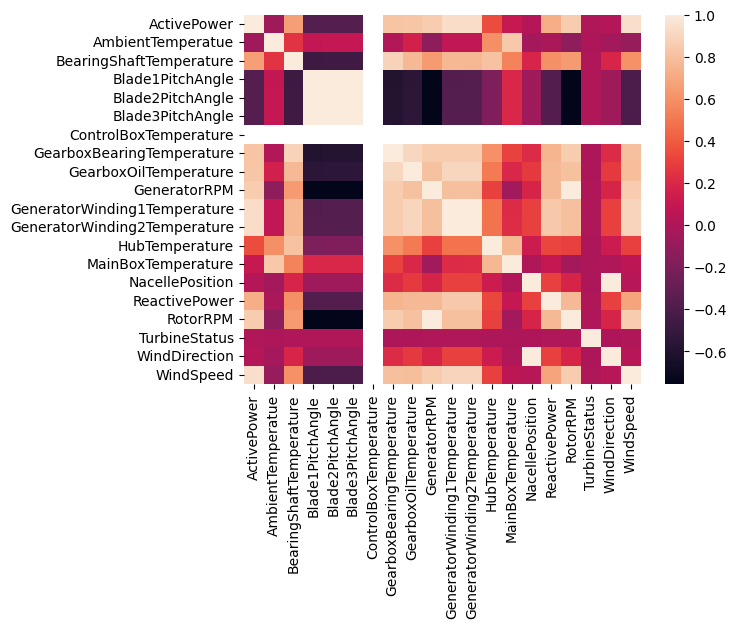

In [107]:
import seaborn as sns
sns.heatmap(df.corr()) #plot pairwise correlation of columns

In [108]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Unnamed: 0                    118224 non-null  object             
 1   ActivePower                   94750 non-null   float64            
 2   AmbientTemperatue             93817 non-null   float64            
 3   BearingShaftTemperature       62518 non-null   float64            
 4   Blade1PitchAngle              41996 non-null   float64            
 5   Blade2PitchAngle              41891 non-null   float64            
 6   Blade3PitchAngle              41891 non-null   float64            
 7   ControlBoxTemperature         62160 non-null   float64            
 8   GearboxBearingTemperature     62540 non-null   float64            
 9   GearboxOilTemperature         62438 non-null   float64            
 10  GeneratorRPM        

In [109]:
#Number of missing values in the data set
df.isnull().sum()

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
Time                                0
dtype: int64

Limpeza dos dados

In [110]:
#Your Code Here
df_selection = df[['Time', 'ActivePower', 'WindSpeed','AmbientTemperatue']]
# Sorting the dataframe by the 'Time' column
df_selection = df_selection.sort_values(by='Time')
df_selection.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118224 entries, 0 to 118223
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Time               118224 non-null  datetime64[ns, UTC]
 1   ActivePower        94750 non-null   float64            
 2   WindSpeed          94595 non-null   float64            
 3   AmbientTemperatue  93817 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 4.5 MB


In [111]:
# Forward-fill missing values in the 'ActivePower' and 'WindSpeed' columns
df_filled = df_selection
df_filled['ActivePower'] = df_filled['ActivePower'].fillna(method='ffill')
df_filled['WindSpeed'] = df_filled['WindSpeed'].fillna(method='ffill')
df_filled['AmbientTemperatue'] = df_filled['AmbientTemperatue'].fillna(method='ffill')
# Backward-fill remaining missing values
df_filled['ActivePower'] = df_filled['ActivePower'].fillna(method='bfill')
df_filled['WindSpeed'] = df_filled['WindSpeed'].fillna(method='bfill')
df_filled['AmbientTemperatue'] = df_filled['AmbientTemperatue'].fillna(method='bfill')
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118224 entries, 0 to 118223
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Time               118224 non-null  datetime64[ns, UTC]
 1   ActivePower        118224 non-null  float64            
 2   WindSpeed          118224 non-null  float64            
 3   AmbientTemperatue  118224 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 4.5 MB


In [112]:
df_filled.isnull().sum()

Time                 0
ActivePower          0
WindSpeed            0
AmbientTemperatue    0
dtype: int64

In [113]:
df_processed = df_selection
df_processed.index = df_processed['Time']

Separar dados em treino, validação e teste de acordo com a data do registro
Treinamento:

[ ~ - 28/02/2020 ] -> Treinamento

[01/03/2020 - 15/03/2020 ] -> Validação

[16/03/2020 - ~] -> Teste

In [114]:
mask = (df_processed.Time < pd.to_datetime("2020-03-01 00:00:00").tz_localize('US/Eastern'))
training_data = df_processed.loc[mask]

val_mask = (df_processed.Time >= pd.to_datetime("2020-03-01").tz_localize('US/Eastern')) & (df_processed.Time <= pd.to_datetime("2020-03-15").tz_localize('US/Eastern'))
val_data = df_processed.loc[val_mask]

test_mask = (df_processed.Time > pd.to_datetime("2020-03-15").tz_localize('US/Eastern'))
test_data = df_processed.loc[test_mask]


Normalização dos dados.
Sugestão: usar MinMaxScaler da biblioteca scikit-learn.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [115]:
from sklearn.preprocessing import MinMaxScaler

# Extracting features for normalization
features_to_normalize = ['ActivePower', 'WindSpeed','AmbientTemperatue']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
training_data[features_to_normalize] = scaler.fit_transform(training_data[features_to_normalize])

# Transform the validation and test data using the parameters learned from the training data
val_data[features_to_normalize] = scaler.transform(val_data[features_to_normalize])
test_data[features_to_normalize] = scaler.transform(test_data[features_to_normalize])

# Checking the updated dataframes
print("Training Data:")
print(training_data.info())

print("\nValidation Data:")
print(val_data.info())

print("\nTest Data:")
print(test_data.info())


Training Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113934 entries, 2017-12-31 00:00:00+00:00 to 2020-03-01 04:50:00+00:00
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Time               113934 non-null  datetime64[ns, UTC]
 1   ActivePower        113934 non-null  float64            
 2   WindSpeed          113934 non-null  float64            
 3   AmbientTemperatue  113934 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 4.3 MB
None

Validation Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2020-03-01 05:00:00+00:00 to 2020-03-15 04:00:00+00:00
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Time               2011 non-null   datetime64[ns, UTC]
 1   ActivePower        2011 non-null   fl

C:\Users\Marli\AppData\Local\Temp\ipykernel_15348\556842265.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[features_to_normalize] = scaler.fit_transform(training_data[features_to_normalize])
C:\Users\Marli\AppData\Local\Temp\ipykernel_15348\556842265.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data[features_to_normalize] = scaler.transform(val_data[features_to_normalize])
C:\Users\Marli\AppData\Local\Temp\ipykernel_15348\556842265.py:14: SettingWithCopyWarning: 
A value is t

In [116]:
#Train
lstm_train_data = training_data[['ActivePower', 'WindSpeed','AmbientTemperatue']]
print(lstm_train_data.head())

                           ActivePower  WindSpeed  AmbientTemperatue
Time                                                                
2017-12-31 00:00:00+00:00     0.018133   0.099216           0.545889
2017-12-31 00:10:00+00:00     0.018133   0.099216           0.545889
2017-12-31 00:20:00+00:00     0.018133   0.099216           0.545889
2017-12-31 00:30:00+00:00     0.018133   0.099216           0.545889
2017-12-31 00:40:00+00:00     0.018133   0.099216           0.545889


Preparar os dados para treinamento usando a técnica de sliding window.

Você poderá implementar um algoritmo próprio ou usar o algoritmo timeseries_dataset_from_array do Keras

 https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [117]:
import numpy as np
import tensorflow as tf
import keras

# sample_length = 20

# Create input and target datasets
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

x_labels = ['WindSpeed','AmbientTemperatue']
y_labels = ['ActivePower']

train_dataset = keras.utils.timeseries_dataset_from_array(
    lstm_train_data[x_labels],
    lstm_train_data[y_labels],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size)

test_dataset = keras.utils.timeseries_dataset_from_array(
    test_data[x_labels],
    test_data[y_labels],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size)

val_dataset = keras.utils.timeseries_dataset_from_array(
    val_data[x_labels],
    val_data[y_labels],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size)


In [118]:
print(len(train_dataset),len(test_dataset),len(val_dataset))

443 7 6



Definição do modelo de deep learning.  O codigo abaixo e apenas uma sugestao inicial.

In [141]:
import tensorflow as tf

# Assuming 'lstm_train_data' is your training dataset
# It should be in the form of (samples, timesteps, features)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(sequence_length,lstm_train_data[x_labels].shape[1])),
    tf.keras.layers.Dense(1)  # Adjust the output size based on your task
])


In [142]:

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Adjust the loss function based on your task

# Display the model summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 50)                2650      
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2701 (10.55 KB)
Trainable params: 2701 (10.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
"""
We'll use the `ModelCheckpoint` callback to regularly save checkpoints, and
the `EarlyStopping` callback to interrupt training when the validation loss
is not longer improving.
"""

path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5, restore_best_weights=True)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

In [144]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=val_dataset,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/20


442/443 [============================>.] - ETA: 0s - loss: 0.0925
Epoch 1: val_loss improved from inf to 0.04880, saving model to model_checkpoint.weights.h5
443/443 [==============================] - 13s 26ms/step - loss: 0.0926 - val_loss: 0.0488
Epoch 2/20
441/443 [============================>.] - ETA: 0s - loss: 0.1435
Epoch 2: val_loss did not improve from 0.04880
443/443 [==============================] - 11s 24ms/step - loss: 0.1433 - val_loss: 0.0555
Epoch 3/20
443/443 [==============================] - ETA: 0s - loss: 0.0687
Epoch 3: val_loss improved from 0.04880 to 0.03773, saving model to model_checkpoint.weights.h5
443/443 [==============================] - 10s 23ms/step - loss: 0.0687 - val_loss: 0.0377
Epoch 4/20
442/443 [============================>.] - ETA: 0s - loss: 0.0609
Epoch 4: val_loss did not improve from 0.03773
443/443 [==============================] - 10s 23ms/step - loss: 0.0609 - val_loss: 0.0520
Epoch 5/20
442/443 [============================>.] - ETA

Daqui para baixo, podem ser gerados os resultados.

A variavel history pode ser usada para plotar as curvas de loss.

Para obter as predicoes, usar model.predict(  ).


Plotar também um grafico com a predição e os valores reais para análise visual.

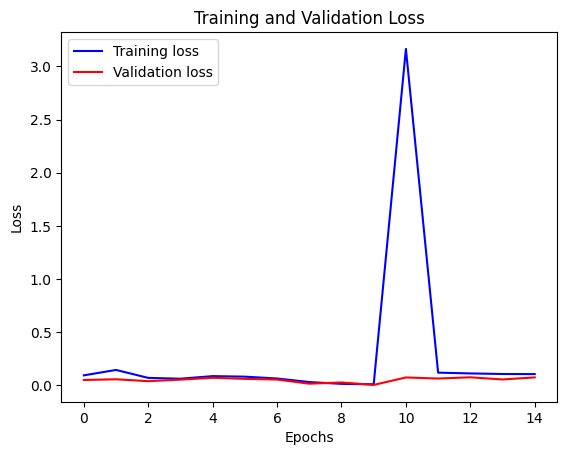

In [145]:
"""
We can visualize the loss with the function below. After one point, the loss stops
decreasing.
"""


def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

8/8 [==============================] - 0s 6ms/step


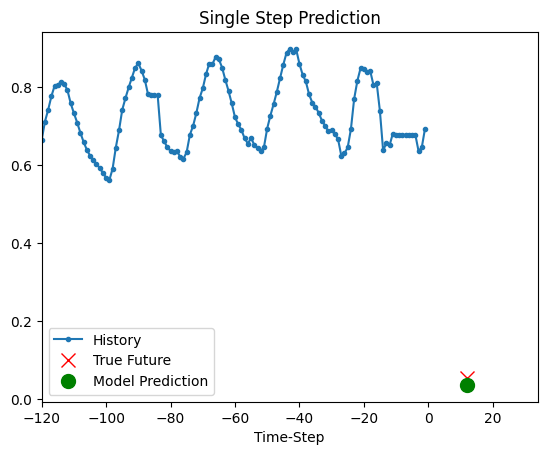

8/8 [==============================] - 0s 5ms/step


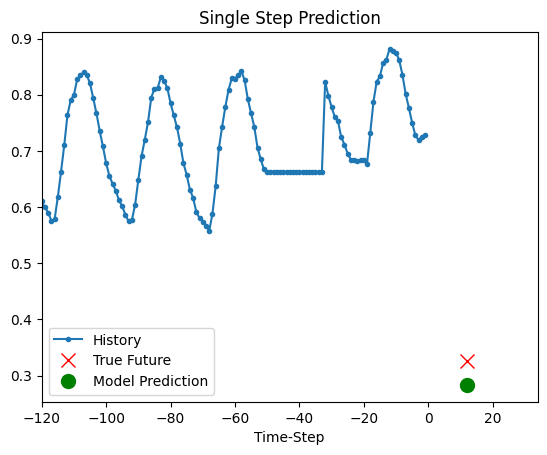

8/8 [==============================] - 0s 5ms/step


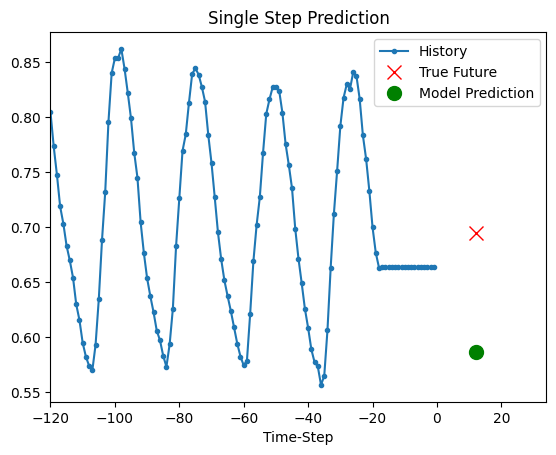

8/8 [==============================] - 0s 5ms/step


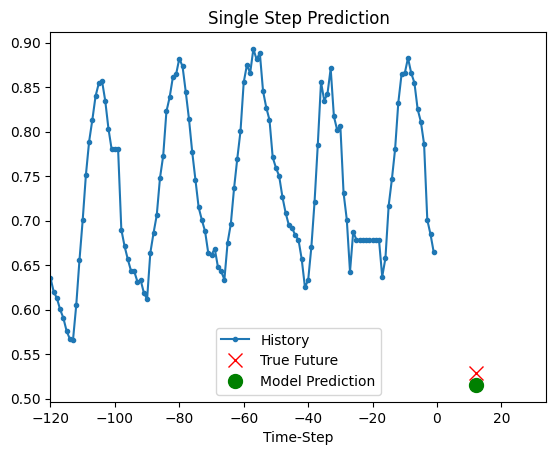

8/8 [==============================] - 0s 6ms/step


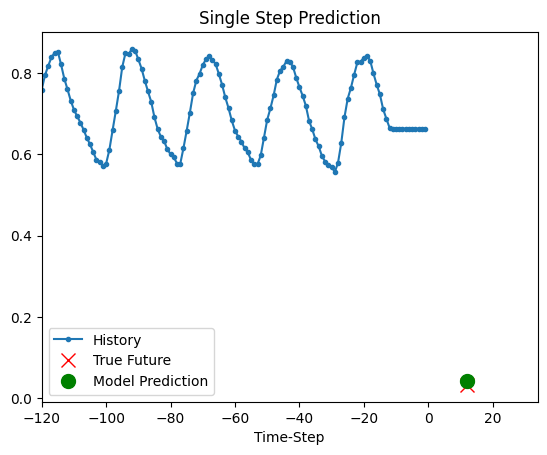

In [148]:

def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in test_dataset.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )